In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import random
import matplotlib.pyplot as plt

### Let's define the necessary functions to intersect the shapefiles. In this case we need to intersect the shapefile 'localidades' (boroughs) with each GeoDataFrame that contains data about any urban feature (such as arterial roads, traffic lights, arborization, total pedestrian space proportion, etc). 

### With these intersections we can calculate the proportion of each feature per borough to calculate the KSI ratio, subsequently

In [2]:
def load_data(path, cols_to_use, bbox = None):
    data = gpd.read_file(path, bbox = bbox)
    return data[cols_to_use]

def reproject_GeoDataFrame(df, epsg_code):
    df = df.to_crs(epsg = epsg_code)
    return df

def intersect_layers(base_df, overlapping_df):
    intersection = gpd.overlay(base_df, overlapping_df, how='intersection', keep_geom_type = False)
    return intersection

### Let's define the shapefiles paths and the columns (features) needed for the study

In [3]:
loc_path = '../data/SHAPES/localidades/bog_loc.shp'
loc_cols = ['Nombre_de_','Identifica','geometry']
#IN THIS CASE, WE ARE GOING TO TEST THE FUNCTIONS WITH THE ARTERIAL ROADS (HIGHWAYS) TO CALCULATE ITS SHARE PER BOROUGH
infr_vial_path = '../data/SHAPES/red_infraestructura_vial/Red_infraestructura_vial.shp'
infr_vial_cols = ['CODIGO_ID','NOMBRE','TRAMO','ANCHO','ESTADO','SHAPE_Leng','SHAPE_Area','geometry']

### Let's apply all the functions for each shapefile

In [4]:
localidades = load_data(loc_path, loc_cols)
infr_vial = load_data(infr_vial_path, infr_vial_cols)

localidades = reproject_GeoDataFrame(localidades, 3116)
infr_vial = reproject_GeoDataFrame(infr_vial, 3116)

In [5]:
intersection = intersect_layers(localidades, infr_vial)

In [6]:
infr_vial[infr_vial['CODIGO_ID'] == '396']

,CODIGO_ID,NOMBRE,TRAMO,ANCHO,ESTADO,SHAPE_Leng,SHAPE_Area,geometry
395,396,Avenida José Celestino Mutis,De Avenida Bicentenario a Avenida de La Esmeralda,40.0,20,1376.803722,26097.034197,"POLYGON ((999229.746 1006404.958, 999205.449 1..."


In [7]:
intersection

,Nombre_de_,Identifica,CODIGO_ID,NOMBRE,TRAMO,ANCHO,ESTADO,SHAPE_Leng,SHAPE_Area,geometry
0,CIUDAD BOLIVAR,19,2,Avenida Alameda del Sur,De Avenida San Francisco a Avenida Camino de P...,25.0,21,1181.780409,13679.862785,"POLYGON ((991894.149 994882.457, 991873.346 99..."
1,CIUDAD BOLIVAR,19,3,Avenida Alameda del Sur,De Avenida San Francisco a Avenida Camino de P...,25.0,19,549.824584,6442.063716,"POLYGON ((992695.955 994167.603, 992690.695 99..."
2,CIUDAD BOLIVAR,19,4,Avenida Alameda del Sur,De Avenida San Francisco a Avenida Camino de P...,25.0,21,967.955830,11954.726193,"POLYGON ((993149.114 994195.281, 993147.516 99..."
3,CIUDAD BOLIVAR,19,5,Avenida Alameda del Sur,De Avenida San Francisco a Avenida Jorge Gaitá...,25.0,19,2959.001655,36450.971973,"POLYGON ((991735.128 995477.858, 991710.191 99..."
4,CIUDAD BOLIVAR,19,6,Avenida Camino de Pasquilla,De Avenida Alamedadel Sur a Límite de suelo Ur...,25.0,21,2066.406437,25310.025433,"POLYGON ((992883.727 993152.077, 992869.696 99..."
...,...,...,...,...,...,...,...,...,...,...
1676,PUENTE ARANDA,16,1072,Avenida Cundinamarca,De Avenida de Las Américas a Avenida Ferrocarr...,28.0,20,201.371396,1910.512386,"POLYGON ((998491.059 1003162.877, 998490.034 1..."
1677,PUENTE ARANDA,16,1074,Avenida Ferrocarril de Occidente,De Avenida Ciudad de Quito a Avenida de Las A...,0.0,19,1342.423601,39805.692697,"POLYGON ((998591.784 1003169.077, 998674.859 1..."
1678,PUENTE ARANDA,16,1075,Avenida Ferrocarril del Sur,De avenida Ferrocarril de Occidente a Avenida ...,48.0,20,396.002455,4145.872240,"POLYGON ((998591.449 1003066.219, 998616.328 1..."
1679,PUENTE ARANDA,16,1095,Enlace Vehicular Avenidas Ferrocarril del Sur ...,Intersección Avenidas Ferrocarril del Sur y Cu...,48.0,20,438.812948,9602.011965,"POLYGON ((998464.753 1003113.423, 998458.003 1..."


### Let's test whether the intersections are correct by selecting some boroughs (by their names) and plotting their respective streets (with different colors to identify them)

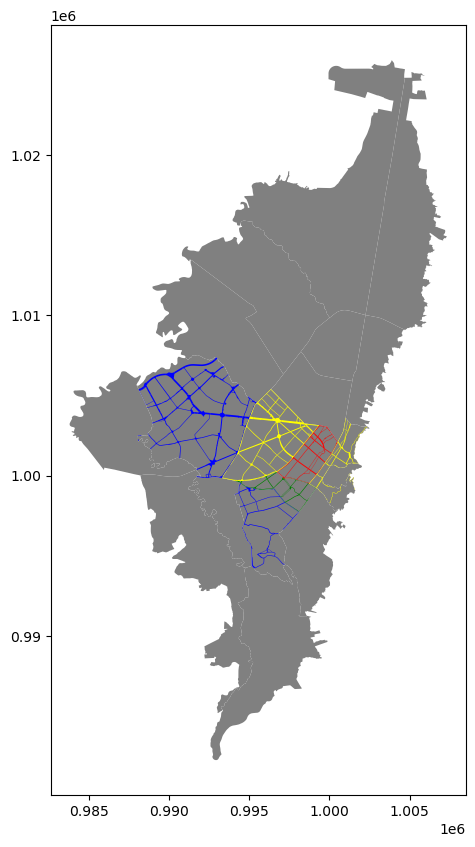

In [19]:
basemap = localidades.plot(color='grey',figsize=(10,10))
locs = ['KENNEDY','PUENTE ARANDA','RAFAEL URIBE URIBE','ANTONIO NARINO','LOS MARTIRES','SANTA FE']
colors = ['red','blue','green','yellow']
for i in locs:
    intersection[intersection['Nombre_de_'] == i].plot(color = random.choice(colors), ax = basemap)